In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
df.columns = ['Age', 'Sex', 'ChestPainType' , 'RestBP','Cholesterol', 'FBS', 'RestECG',
              'MaxHR','ExerciseAngina','Oldpeak','ST_Slope','NumVesselsFluoro','Thal','Target']

In [14]:
"""pd.get_dummies() function in pandas is used to convert categorical variables into 
numerical format so that machine learning models can use them. This process is called 
one-hot encoding."""

"""drop_first=True drops the first category to avoid multicollinearity (redundant information) when using the data in models like linear regression."""
df_encoded = pd.get_dummies(df, columns=['ChestPainType'], drop_first=True)
df_encoded.head()

,Age,Sex,RestBP,Cholesterol,FBS,RestECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,NumVesselsFluoro,Thal,Target,ChestPainType_1,ChestPainType_2,ChestPainType_3
0,63,1,145,233,1,0,150,0,2.3,0,0,1,1,False,False,True
1,37,1,130,250,0,1,187,0,3.5,0,0,2,1,False,True,False
2,41,0,130,204,0,0,172,0,1.4,2,0,2,1,True,False,False
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,True,False,False
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,False,False,False


In [15]:
df_encoded.dtypes

Age                   int64
Sex                   int64
RestBP                int64
Cholesterol           int64
FBS                   int64
RestECG               int64
MaxHR                 int64
ExerciseAngina        int64
Oldpeak             float64
ST_Slope              int64
NumVesselsFluoro      int64
Thal                  int64
Target                int64
ChestPainType_1        bool
ChestPainType_2        bool
ChestPainType_3        bool
dtype: object

In [16]:
df_encoded2 = pd.get_dummies(df, columns=['ChestPainType', 'Thal'], drop_first=True)
df_encoded2.head()

,Age,Sex,RestBP,Cholesterol,FBS,RestECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,NumVesselsFluoro,Target,ChestPainType_1,ChestPainType_2,ChestPainType_3,Thal_1,Thal_2,Thal_3
0,63,1,145,233,1,0,150,0,2.3,0,0,1,False,False,True,True,False,False
1,37,1,130,250,0,1,187,0,3.5,0,0,1,False,True,False,False,True,False
2,41,0,130,204,0,0,172,0,1.4,2,0,1,True,False,False,False,True,False
3,56,1,120,236,0,1,178,0,0.8,2,0,1,True,False,False,False,True,False
4,57,0,120,354,0,1,163,1,0.6,2,0,1,False,False,False,False,True,False


In [17]:
# include=[np.number] – tells pandas to select only columns with numeric data types (like int, float).
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.head()

,Age,Sex,ChestPainType,RestBP,Cholesterol,FBS,RestECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,NumVesselsFluoro,Thal,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


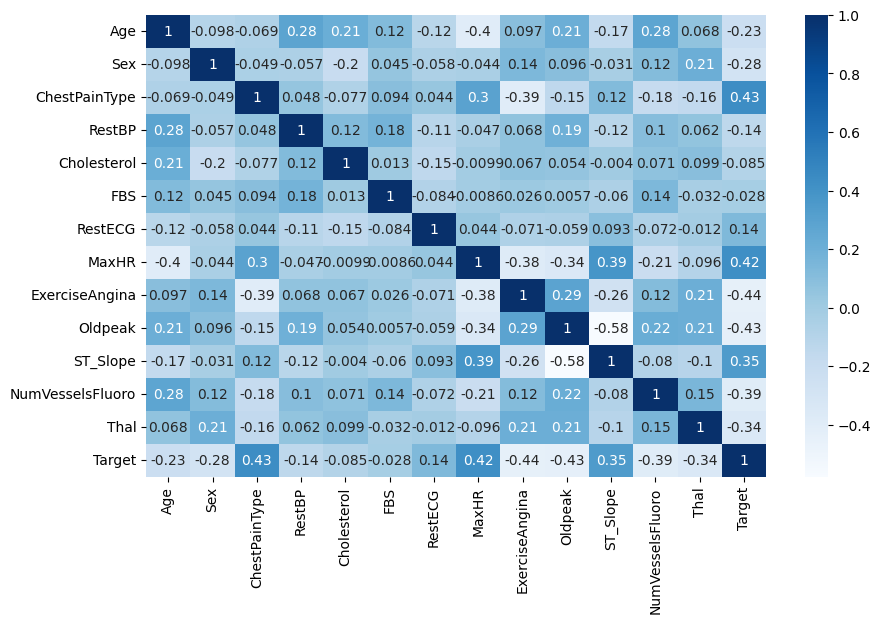

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')
plt.show()

In [19]:
# .corr() computes pairwise correlation between all numeric columns in a DataFrame.
correlation_matrix = df_encoded2.corr()
correlation_matrix

,Age,Sex,RestBP,Cholesterol,FBS,RestECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,NumVesselsFluoro,Target,ChestPainType_1,ChestPainType_2,ChestPainType_3,Thal_1,Thal_2,Thal_3
Age,1.000000,-0.098447,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,-0.225439,-0.147399,-0.059432,0.047516,0.063758,-0.135891,0.110752
Sex,-0.098447,1.000000,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,-0.280937,-0.041249,-0.116588,0.088043,0.141135,-0.376365,0.321559
RestBP,0.279351,-0.056769,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,-0.144931,-0.081851,-0.045107,0.151343,0.076369,-0.140712,0.109573
Cholesterol,0.213678,-0.197912,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,-0.085239,-0.012750,-0.037918,-0.050589,-0.093560,-0.004591,0.059621
FBS,0.121308,0.045032,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.028046,-0.060649,0.083679,0.055511,0.091351,-0.086774,0.030953
RestECG,-0.116211,-0.058196,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,0.137230,0.077859,0.084196,-0.074654,-0.013429,0.029597,-0.023012
MaxHR,-0.398522,-0.044020,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,0.421741,0.248317,0.165475,0.079082,-0.159748,0.294801,-0.215417
ExerciseAngina,0.096801,0.141664,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,-0.436757,-0.233863,-0.271028,-0.093384,0.063073,-0.328539,0.300223
Oldpeak,0.210013,0.096093,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,-0.430696,-0.277513,-0.132444,0.086959,0.104635,-0.339086,0.302145
ST_Slope,-0.168814,-0.030711,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.080155,0.345877,0.202807,0.109769,-0.064509,-0.185825,0.298671,-0.217318


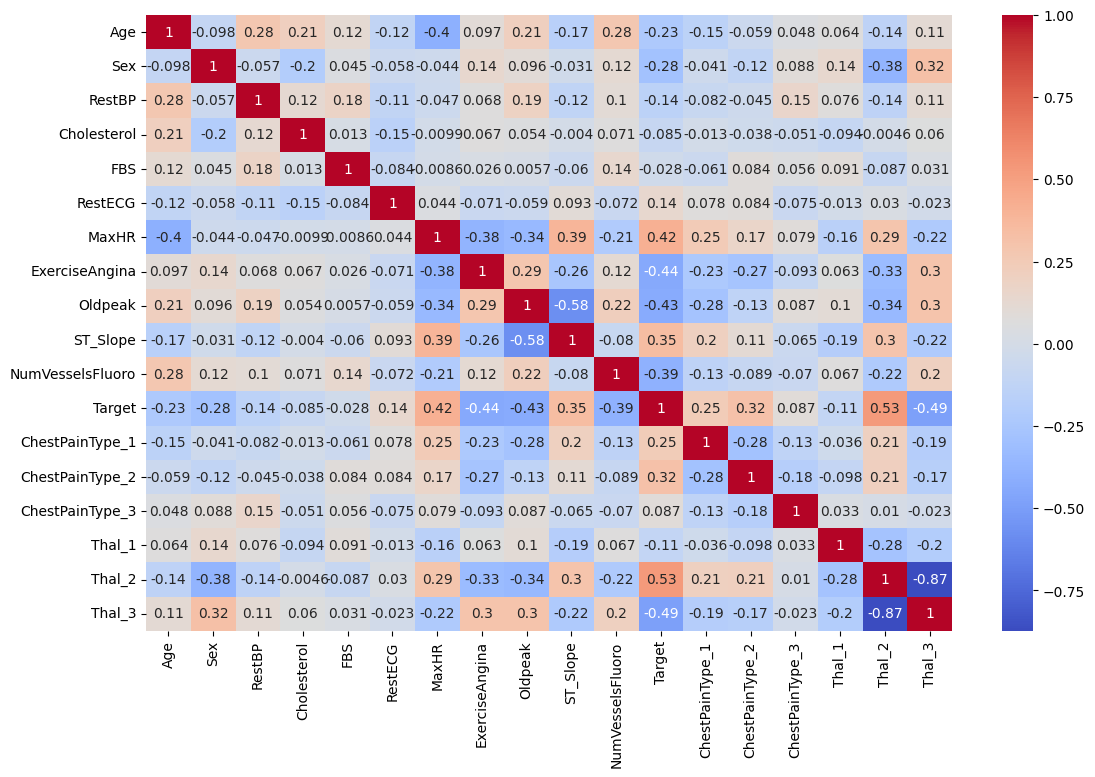

In [20]:
plt.figure(figsize=(13,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()